In [1]:
dataset = read.csv('Position_Salaries.csv')
dataset= dataset[2:3]

# Create simple linear regression model

In [2]:
lin_reg= lm(formula= Salary ~., 
           data= dataset)

In [3]:
summary(lin_reg)


Call:
lm(formula = Salary ~ ., data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-170818 -129720  -40379   65856  386545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -195333     124790  -1.565  0.15615   
Level          80879      20112   4.021  0.00383 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 182700 on 8 degrees of freedom
Multiple R-squared:  0.669,	Adjusted R-squared:  0.6277 
F-statistic: 16.17 on 1 and 8 DF,  p-value: 0.003833


In [4]:
library(ggplot2)

# Visualize simple linear regression model fit

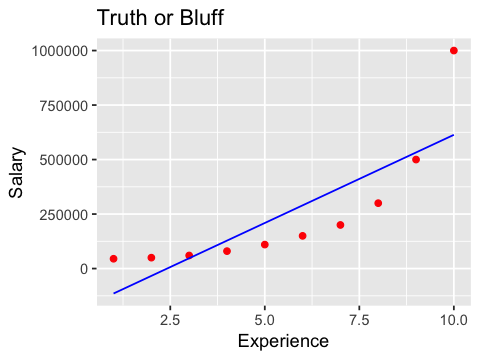

In [5]:
options(repr.plot.width=4, repr.plot.height=3)

ggplot()+ 
    geom_point(aes(x= dataset$Level, y= dataset$Salary),
              col= 'red') +
    geom_line(aes(x= dataset$Level, y= predict(lin_reg, newdata= dataset)),
              col= 'blue') +
    ggtitle('Truth or Bluff') +
    xlab('Experience') +
    ylab('Salary')

# Predict with simple linear regression model

In [6]:
y_pred= predict(lin_reg, data.frame(Level= 6.5))
y_pred

1 
330378.8

# Create polynomial regression model

In [7]:
dataset$Level2 = dataset$Level^2 
dataset$Level3 = dataset$Level^3
dataset$Level4 = dataset$Level^4 
dataset

Level,Salary,Level2,Level3,Level4
1,45000,1,1,1
2,50000,4,8,16
3,60000,9,27,81
4,80000,16,64,256
5,110000,25,125,625
6,150000,36,216,1296
7,200000,49,343,2401
8,300000,64,512,4096
9,500000,81,729,6561
10,1000000,100,1000,10000


In [8]:
poly_reg= lm(formula= Salary ~., 
            data= dataset)

In [9]:
summary(poly_reg)


Call:
lm(formula = Salary ~ ., data = dataset)

Residuals:
     1      2      3      4      5      6      7      8      9     10 
 -8357  18240   1358 -14633 -11725   6725  15997  10006 -28695  11084 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  184166.7    67768.0   2.718  0.04189 * 
Level       -211002.3    76382.2  -2.762  0.03972 * 
Level2        94765.4    26454.2   3.582  0.01584 * 
Level3       -15463.3     3535.0  -4.374  0.00719 **
Level4          890.2      159.8   5.570  0.00257 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20510 on 5 degrees of freedom
Multiple R-squared:  0.9974,	Adjusted R-squared:  0.9953 
F-statistic: 478.1 on 4 and 5 DF,  p-value: 1.213e-06


# Fit data with polynomial regression model

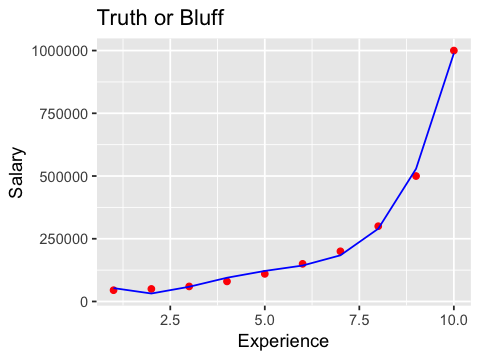

In [11]:
options(repr.plot.width=4, repr.plot.height=3)

ggplot()+ 
    geom_point(aes(x= dataset$Level, y= dataset$Salary),
              col= 'red') +
    geom_line(aes(x= dataset$Level, y= predict(poly_reg, newdata= dataset)),
              col= 'blue') +
    ggtitle('Truth or Bluff') +
    xlab('Experience') +
    ylab('Salary')


# Making the curve more smooth with smaller increments

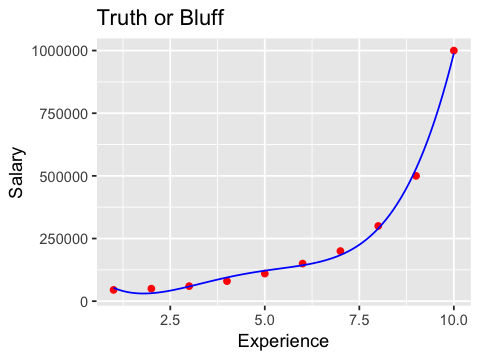

In [24]:
x_grid= seq(min(dataset$Level), max(dataset$Level), 0.1)

ggplot()+ 
    geom_point(aes(x= dataset$Level, y= dataset$Salary),
              col= 'red') +
    geom_line(aes(x= x_grid, y= predict(poly_reg, newdata= data.frame(Level= x_grid,
                                                                     Level2= x_grid^2,
                                                                     Level3 = x_grid^3,
                                                                     Level4 = x_grid^4))),
              col= 'blue') +
    ggtitle('Truth or Bluff') +
    xlab('Experience') +
    ylab('Salary')



# Predict with Polynomial regression model

In [27]:
y_pred = predict(poly_reg, data.frame(Level = 6.5,
                                     Level2= 6.5^2,
                                     Level3 = 6.5^3,
                                     Level4 = 6.5^4))

In [28]:
y_pred

1 
158862.5